In [1]:
# logistic regression
# Conny Lin | June 13, 2020

In [1]:
# computer dependent local variable settings 
import socket
# check which computer this code is running on
hostname = socket.gethostname()
hostname = hostname.split('.')
hostname = hostname[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = ['/Users/connylin/Dropbox/Code/proj/brainstation_capstone/']
    datapath = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/nutcracker_sample_1Meach.csv'
elif hostname == 'Angular Gyrus':
    pylibrary = ['/Users/connylin/Code/proj/brainstation_capstone/']
    datapath = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/nutcracker_sample_1Meach.csv'
else:
    assert False, 'host computer not regonized'
    
# import standard libraries
import sys, os, pickle, socket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# load local libraries
for path in pylibrary:
    if path not in sys.path:
        sys.path.insert(1, path)
import BrainStationLib
from BrainStationLib.ETL.datatransform import Nutcracker

# get machine learning input data
X_train, X_test, y_train, y_test = Nutcracker().mldata()

# import ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [9]:
# machine learning - rough try
C=0.01
random_state = 318
max_iter=1000
OLS = LogisticRegression(C=C, random_state=random_state, max_iter=max_iter)
OLS.fit(X_train, y_train)
y_predicted = OLS.predict(X_test)

print(f'train score: {OLS.score(X_train,y_train)}')
print(f'test score: {OLS.score(X_test,y_test)}')

/Users/connylin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train score: 0.8644
test score: 0.8638375


* C=0.01
* random_state = 318
* max_iter=1000

results are train/test both = 0.86

In [21]:
X_columns = np.array(NC.names['X'])

In [41]:
# take a look at predictive value of each parameter
# set dataframe
top_features = pd.DataFrame(X_columns, columns=['features'])
# get coefficient
X_logistic_coef = OLS.coef_
# put int OLS_coef
top_features['OLS_coef'] = X_logistic_coef[0]
# put in absolute
top_features['OLS_coef_abs'] = np.absolute(top_features['OLS_coef'].values)

In [44]:
top_features.sort_values(ascending=False, inplace=True, by=['OLS_coef_abs'])
top_features

,features,OLS_coef,OLS_coef_abs
5,width,-10.813590,10.813590
9,aspect,-9.695887,9.695887
10,relaspect,3.588359,3.588359
7,length,2.830295,2.830295
6,relwidth,2.072623,2.072623
8,rellength,-1.924569,1.924569
2,area,-1.060606,1.060606
13,speed,0.994026,0.994026
3,midline,-0.943060,0.943060
4,morphwidth,0.691033,0.691033


* width, aspect are top predictors for etoh worms.
* interesting that curve doesn't do much

Should look at graphs differences between the two parameters

In [48]:
# rough tune
# settingss
c_power_array = np.arange(-6,3, dtype=float)
c_value_list = [10**c for c in c_power_array]
max_iter_setting = 1000
cv = 5
import warnings
warnings.filterwarnings("ignore")
# solver_setting = 'lbfgs'

# train
train_score = []
test_score = []
cross_validation_scores = []
cross_validation_stdev = []
for cp in c_value_list:
    print(f'running C = {cp}')
    model = LogisticRegression(C=cp,
                               penalty='l2',
                               max_iter=max_iter_setting,
                               random_state=random_state)
    
    cv_result = cross_val_score(model, X_train, y_train, cv=cv)    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cv_result)
    cv_stdev = np.std(cv_result)
    # add to result
    cross_validation_scores.append(cv_score)
    cross_validation_stdev.append(cv_stdev)

running C = 1e-06
running C = 1e-05
running C = 0.0001
running C = 0.001
running C = 0.01
running C = 0.1
running C = 1.0
running C = 10.0
running C = 100.0


NameError: name 'plt' is not defined

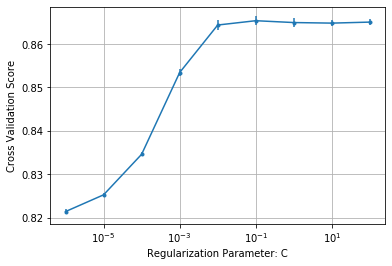

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]


In [51]:
# plot
plt.figure()
plt.errorbar(c_value_list, 
             cross_validation_scores,
             yerr=cross_validation_stdev,
             label="Cross Validation Score",marker='.')
plt.xscale('Log')
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();
print(c_value_list)

In [53]:
for c in cross_validation_scores:
    print(c)

0.8214281250000001
0.825279375
0.834600625
0.853409375
0.8643325
0.865325
0.864900625
0.8647712500000001
0.865005


In [45]:
# look at differences between width and aspect between the two


['X',
 'X_test',
 'X_test_scaled',
 'X_train',
 'X_train_scaled',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'datapath',
 'loaddata',
 'names',
 'pCapstone',
 'scaledata',
 'split_test_train',
 'transform',
 'transform_full',
 'y',
 'y_test',
 'y_train']